# Different priorities for different client types

## Importing modules

In [1]:
# Simulation
from queuesim.random_dist import exp as dist_exp
from queuesim.descore import Simulator
from queuesim.stations import Source, Process, DecideClientType, Dispose

# Plot model
from queuesim import build_graph
import networkx as nx
import matplotlib.pyplot as plt

## Model parameters

In [2]:
# Mean inter-arrival time
mean_i = 100

# Mean service time
mean_s = 80

# Number of operators
c = 1

# Number of arrivals to be simulated
count = 100_000

## Priority formula

For type A clients, each waiting second has 5 times more value in terms of service priority than for type B clients.

In [3]:
def priority(client, waiting_time):
    if client.type_name=="ClientsA":
        return 5*waiting_time
    else:
        return waiting_time

## Building model

In [4]:
# Define parameters
get_i = dist_exp(mean_i * 2)  # average inter-arrival time mean_i is for both client types together. mean_i*2 is for a single client type.
get_s = dist_exp(mean_s)

# Create and configure stations
simulator = Simulator()
source1 = Source(simulator, round(count / 2), get_i, client_type_name="ClientsA")
source2 = Source(simulator, round(count / 2), get_i, client_type_name="ClientsB")
process = Process(simulator, get_s, c, getPriority=priority)
decide = DecideClientType(simulator)
dispose1 = Dispose(simulator)
dispose2 = Dispose(simulator)

# Link stations
source1.set_next(process)
source2.set_next(process)
process.set_next(decide)
decide.set_next("ClientsA", dispose1)
decide.set_next("ClientsB", dispose2)

## Queueing network model

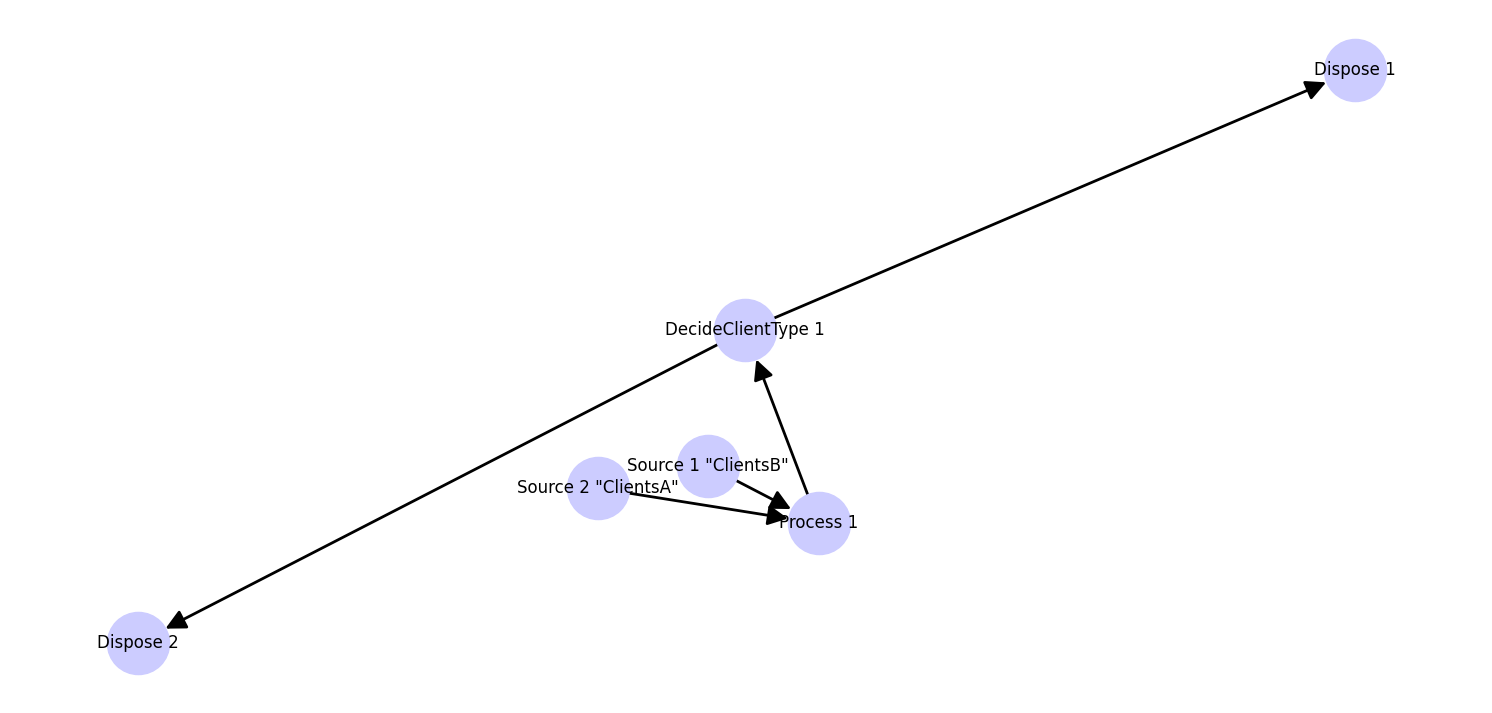

In [5]:
dg = build_graph([source1, source2])
_, ax = plt.subplots(figsize=(19, 9))
nx.draw(dg, ax=ax, with_labels=True, node_color='#CCCCFF', node_size=2000, arrowsize=30, width=2)

## Simulation

In [6]:
# Run simulation
%time simulator.run()

# Show results
print("ClientsA")
print("  Service times (S): " + dispose1.statistic_client_service.info)
print("  Residence times (V): " + dispose1.statistic_client_residence.info)
print("  Waiting times (W): " + dispose1.statistic_client_waiting.info)
print("ClientsB")
print("  Service times (S): " + dispose2.statistic_client_service.info)
print("  Residence times (V): " + dispose2.statistic_client_residence.info)
print("  Waiting times (W): " + dispose2.statistic_client_waiting.info)

CPU times: total: 2.73 s
Wall time: 2.74 s
ClientsA
  Service times (S): mean = 79.8, sd = 79.7, cv = 1.0
  Residence times (V): mean = 249.4, sd = 200.1, cv = 0.8
  Waiting times (W): mean = 169.6, sd = 183.7, cv = 1.1
ClientsB
  Service times (S): mean = 80.1, sd = 80.4, cv = 1.0
  Residence times (V): mean = 554.8, sd = 644.5, cv = 1.2
  Waiting times (W): mean = 474.8, sd = 639.5, cv = 1.3
